## Delay Distribution Sweep Analysis
### Análisis sistemático de cómo diferentes distribuciones de delays afectan el acoplamiento funcional

In [1]:
# =============================================================================
# NOTEBOOK SETUP - Two Population Delay Sweep Execution
# =============================================================================
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import pickle
from scipy import stats

# Robust directory setup
if Path.cwd().name == 'two_populations':
    os.chdir("../../")
    
from src.two_populations.helpers.logger import setup_logger

logger = setup_logger(
    experiment_name="delay_sweep_gaussian",
    console_level="INFO",
    file_level="DEBUG",
    log_to_file=False
)

logger.info(f"Working directory: {Path.cwd()}")
logger.info(f"Python path: {sys.path[0]}")

# Configuración de plots
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

INFO     | __main__:<module>:29 - Working directory: /home/ubuntu-deduce/Projects/izhikevich
INFO     | __main__:<module>:30 - Python path: /home/ubuntu-deduce/.asdf/installs/python/3.10.13/lib/python310.zip


## 1. Configuración y carga de datos

In [2]:
def load_multi_family_csvs(base_dirs):
    all_data = []
    
    for base_dir in base_dirs:
        if not base_dir.exists():
            continue
            
        summary_files = list(base_dir.rglob('summary_config_*.csv'))
        
        for csv_file in summary_files:
            df = pd.read_csv(csv_file)
            
            parent_name = csv_file.parents[1].name
            parts = parent_name.split('_')
            
            df['delay_family'] = parts[4] if len(parts) > 4 else 'UNKNOWN'
            df['coupling_label'] = parts[5] if len(parts) > 5 else 'UNKNOWN'
            df['sweep_dir'] = parent_name
            df['config_dir'] = csv_file.parent.name
            
            all_data.append(df)
    
    combined = pd.concat(all_data, ignore_index=True)
    combined['weight_scale'] = pd.to_numeric(combined['weight_scale'], errors='coerce')
    return combined

In [3]:
# %% CONFIGURACIÓN
# Directorio base del experimento
BASE_DIRS = [
    Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310'),  # DELTA
    # Path('./results/experiments/two_populations/step_input_diff_rois/20251009_175018')  # LOGNORMAL
    # Path('./results/experiments/two_populations/step_input_diff_rois/[GAMMA_TIMESTAMP]'),
    # Path('./results/experiments/two_populations/step_input_diff_rois/20251009_173149'),
    # Path('./results/experiments/two_populations/step_input_diff_rois/20251009_181228'),
]

df_all = load_multi_family_csvs(BASE_DIRS)

# Cargar todos los CSVs de configuraciones
coupling_levels = ['NULL', 'VERYWEAK', 'WEAK', 'MEDIUM', 'SEMISTRONG', 'STRONG']
delay_types = ['lognormal', 'uniform', 'gamma', 'delta', 'beta']

print(f"✓ {len(df_all)} configs")
print(f"Familias: {sorted(df_all['delay_family'].unique())}")
print(f"Couplings: {sorted(df_all['coupling_label'].unique())}")

✓ 42 configs
Familias: ['DELTA']
Couplings: ['MEDIUM', 'NULL', 'STRONG', 'VERYSTRONG', 'VERYWEAK', 'WEAK']


In [4]:

print(f"✓ {len(df_all)} configs, {len(df_all['delay_family'].unique())} familias")

print(f"\n✓ Datos cargados: {len(df_all)} configuraciones")
print(f"  Coupling levels: {sorted(df_all['coupling_label'].unique())}")
print(f"  Delay families: {sorted(df_all['delay_family'].unique())}")
print(f"  Delay types (configs): {sorted(df_all['delay_type'].unique())}")
print(f"  Weight scales: {sorted(df_all['weight_scale'].unique())}")
print(f"\nConfigs por coupling:")
print(df_all.groupby('coupling_label').size())

✓ 42 configs, 1 familias

✓ Datos cargados: 42 configuraciones
  Coupling levels: ['MEDIUM', 'NULL', 'STRONG', 'VERYSTRONG', 'VERYWEAK', 'WEAK']
  Delay families: ['DELTA']
  Delay types (configs): ['constant']
  Weight scales: [np.float64(0.0), np.float64(0.6749999999999999), np.float64(1.35), np.float64(2.025), np.float64(2.7), np.float64(3.375)]

Configs por coupling:
coupling_label
MEDIUM        7
NULL          7
STRONG        7
VERYSTRONG    7
VERYWEAK      7
WEAK          7
dtype: int64


In [5]:
# %% EJECUTAR
sweep_dir_delta = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310')
df_deltas = df_all[df_all['delay_family'] == 'DELTA']
subset = df_deltas[df_deltas['coupling_label']  == df_deltas['coupling_label'][0]]

# load_and_average_ac_curves(sweep_dir_delta, subset, 10)

In [6]:
trial_file = "./results/experiments/two_populations/step_input_diff_rois/20251009_171310/MS_step_gaussian_input_DELTA_VERYWEAK_k4p5_dt0p1_T4000_10trials__/figures/MS_VERYWEAK_step_gaussian_input_delta_9/trial_5_full.pkl"

    
with open(trial_file, 'rb') as f:
    trial = pickle.load(f)
    
trial['autocorr_A']['lags']

array([-50.  , -49.75, -49.5 , -49.25, -49.  , -48.75, -48.5 , -48.25,
       -48.  , -47.75, -47.5 , -47.25, -47.  , -46.75, -46.5 , -46.25,
       -46.  , -45.75, -45.5 , -45.25, -45.  , -44.75, -44.5 , -44.25,
       -44.  , -43.75, -43.5 , -43.25, -43.  , -42.75, -42.5 , -42.25,
       -42.  , -41.75, -41.5 , -41.25, -41.  , -40.75, -40.5 , -40.25,
       -40.  , -39.75, -39.5 , -39.25, -39.  , -38.75, -38.5 , -38.25,
       -38.  , -37.75, -37.5 , -37.25, -37.  , -36.75, -36.5 , -36.25,
       -36.  , -35.75, -35.5 , -35.25, -35.  , -34.75, -34.5 , -34.25,
       -34.  , -33.75, -33.5 , -33.25, -33.  , -32.75, -32.5 , -32.25,
       -32.  , -31.75, -31.5 , -31.25, -31.  , -30.75, -30.5 , -30.25,
       -30.  , -29.75, -29.5 , -29.25, -29.  , -28.75, -28.5 , -28.25,
       -28.  , -27.75, -27.5 , -27.25, -27.  , -26.75, -26.5 , -26.25,
       -26.  , -25.75, -25.5 , -25.25, -25.  , -24.75, -24.5 , -24.25,
       -24.  , -23.75, -23.5 , -23.25, -23.  , -22.75, -22.5 , -22.25,
      

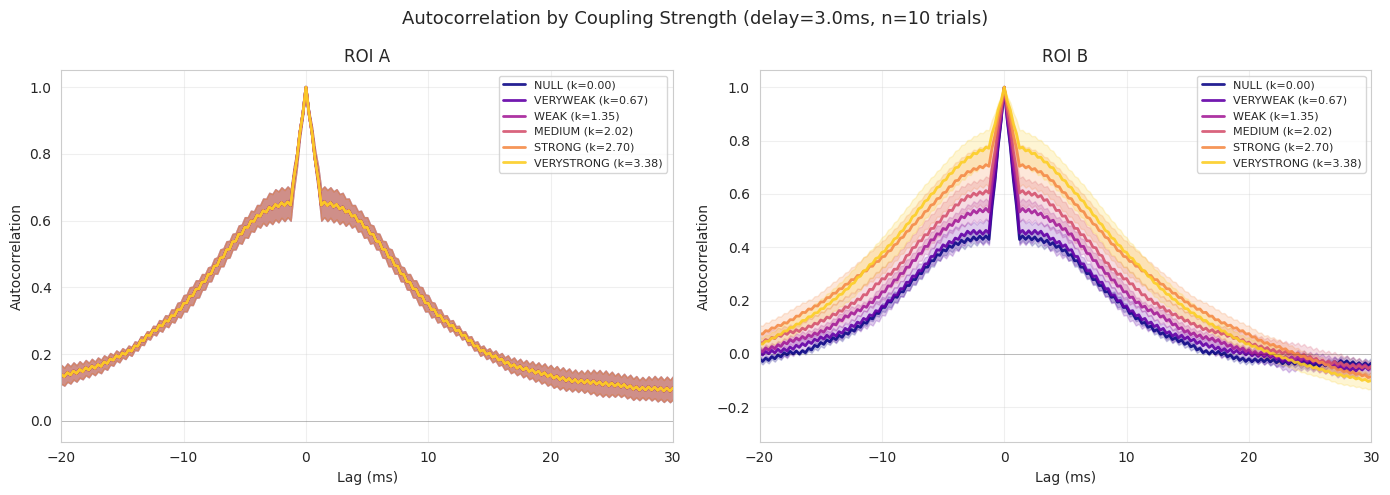

In [7]:
# %% CARGAR AC PARA UN SOLO DELAY
def load_ac_for_single_delay(sweep_dir, df_subset, delay_ms, n_trials=10):
    """Cargar AC para un delay específico, agrupado por coupling"""
    ac_by_coupling = {}
    
    for coupling in df_subset['coupling_label'].unique():
        subset = df_subset[(df_subset['coupling_label'] == coupling) & 
                          (df_subset['delay_mean_ms'] == delay_ms)]
        
        if len(subset) == 0:
            continue
            
        config_name = subset['config'].values[0]
        sweep_subdir = subset['sweep_dir'].values[0]
        
        all_lags_A, all_ac_A = [], []
        all_lags_B, all_ac_B = [], []
        
        for trial_idx in range(n_trials):
            trial_file = sweep_dir / sweep_subdir / "figures" / config_name / f"trial_{trial_idx+1}_full.pkl"
            
            if not trial_file.exists():
                continue
                
            with open(trial_file, 'rb') as f:
                trial = pickle.load(f)
            
            ac_A = trial.get('autocorr_A', {})
            if 'lags' in ac_A:
                all_lags_A.append(ac_A['lags'])
                all_ac_A.append(ac_A['correlation'])
            
            ac_B = trial.get('autocorr_B', {})
            if 'lags' in ac_B:
                all_lags_B.append(ac_B['lags'])
                all_ac_B.append(ac_B['correlation'])
        
        if len(all_ac_A) > 0:
            ac_by_coupling[coupling] = {
                'weight_scale': subset['weight_scale'].values[0],
                'lags_A': all_lags_A[0],
                'ac_A_mean': np.mean(all_ac_A, axis=0),
                'ac_A_std': np.std(all_ac_A, axis=0),
                'lags_B': all_lags_B[0],
                'ac_B_mean': np.mean(all_ac_B, axis=0),
                'ac_B_std': np.std(all_ac_B, axis=0),
                'n_trials': len(all_ac_A)
            }
    
    return ac_by_coupling

# %% PLOT AC SEPARADO POR ROI
def plot_ac_by_coupling_separate(sweep_dir, df_deltas, delay_ms=3.0, n_trials=10):
    """Plot AC con un panel para A y otro para B, superponer couplings"""
    
    couplings = ['NULL', 'VERYWEAK', 'WEAK', 'MEDIUM', 'STRONG', 'VERYSTRONG']
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(couplings)))
    
    ac_data = load_ac_for_single_delay(sweep_dir, df_deltas, delay_ms, n_trials)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Panel A
    for coupling, color in zip(couplings, colors):
        if coupling not in ac_data:
            continue
        ac = ac_data[coupling]
        k = ac['weight_scale']
        
        axes[0].plot(ac['lags_A'], ac['ac_A_mean'],
                    color=color, linewidth=2, alpha=0.9,
                    label=f'{coupling} (k={k:.2f})')
        axes[0].fill_between(ac['lags_A'],
                            ac['ac_A_mean'] - ac['ac_A_std'],
                            ac['ac_A_mean'] + ac['ac_A_std'],
                            color=color, alpha=0.2)
    
    axes[0].set_xlabel('Lag (ms)')
    axes[0].set_ylabel('Autocorrelation')
    axes[0].set_title('ROI A')
    axes[0].legend(fontsize=8)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(-20, 30)
    axes[0].axhline(0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    
    # Panel B
    for coupling, color in zip(couplings, colors):
        if coupling not in ac_data:
            continue
        ac = ac_data[coupling]
        k = ac['weight_scale']
        
        axes[1].plot(ac['lags_B'], ac['ac_B_mean'],
                    color=color, linewidth=2, alpha=0.9,
                    label=f'{coupling} (k={k:.2f})')
        axes[1].fill_between(ac['lags_B'],
                            ac['ac_B_mean'] - ac['ac_B_std'],
                            ac['ac_B_mean'] + ac['ac_B_std'],
                            color=color, alpha=0.2)
    
    axes[1].set_xlabel('Lag (ms)')
    axes[1].set_ylabel('Autocorrelation')
    axes[1].set_title('ROI B')
    axes[1].legend(fontsize=8)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(-20, 30)
    axes[1].axhline(0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    
    plt.suptitle(f'Autocorrelation by Coupling Strength (delay={delay_ms}ms, n={n_trials} trials)', 
                 fontsize=13)
    plt.tight_layout()
    return fig

# %% EJECUTAR
sweep_dir_delta = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310')
df_deltas = df_all[df_all['delay_family'] == 'DELTA']

fig = plot_ac_by_coupling_separate(sweep_dir_delta, df_deltas, delay_ms=3.0, n_trials=10)
plt.show()

In [9]:
 list(base_dir.glob(pattern))

[]

In [10]:
import pickle
import numpy as np
from pathlib import Path

# Navegar estructura correcta
base_dir = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_173149')

# Buscar trials directamente
trial_files = list(base_dir.rglob('trial_*.pkl'))
print(f"Found {len(trial_files)} trials\n")

# Cargar primer trial
trial_path = trial_files[0]
print(f"Loading: {trial_path.name}\n")

with open(trial_path, 'rb') as f:
    trial = pickle.load(f)

# Explorar
print("=== TRIAL KEYS ===")
print(list(trial.keys()))

print("\n=== AUTOCORR_A ===")
print(f"Type: {type(trial['autocorr_A'])}")

if isinstance(trial['autocorr_A'], dict):
    print(f"Keys: {list(trial['autocorr_A'].keys())}")
    for k, v in trial['autocorr_A'].items():
        print(f"  {k}: shape={np.array(v).shape}, first_vals={np.array(v)[:5]}")
else:
    arr = np.array(trial['autocorr_A'])
    print(f"Shape: {arr.shape}")
    print(f"First 5: {arr[:5]}")

Found 150 trials

Loading: trial_2_full.pkl

=== TRIAL KEYS ===
['time', 'rate_A', 'rate_B', 't0_ms', 'cross_correlation', 'autocorr_A', 'autocorr_B', 'int_A', 'int_B', 'plv_pli', 'coherence', 'psd_A', 'psd_B', 'spike_times_A', 'spike_neurons_A', 'spike_times_B', 'spike_neurons_B']

=== AUTOCORR_A ===
Type: <class 'dict'>
Keys: ['lags', 'correlation', 'peak_lag', 'peak_value', 'lag_sign_convention']
  lags: shape=(401,), first_vals=[-50.   -49.75 -49.5  -49.25 -49.  ]
  correlation: shape=(401,), first_vals=[-0.00176229 -0.00883993 -0.00078746 -0.00866908 -0.00201555]


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

/tmp/ipykernel_90923/3390419438.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=10, loc='upper right')


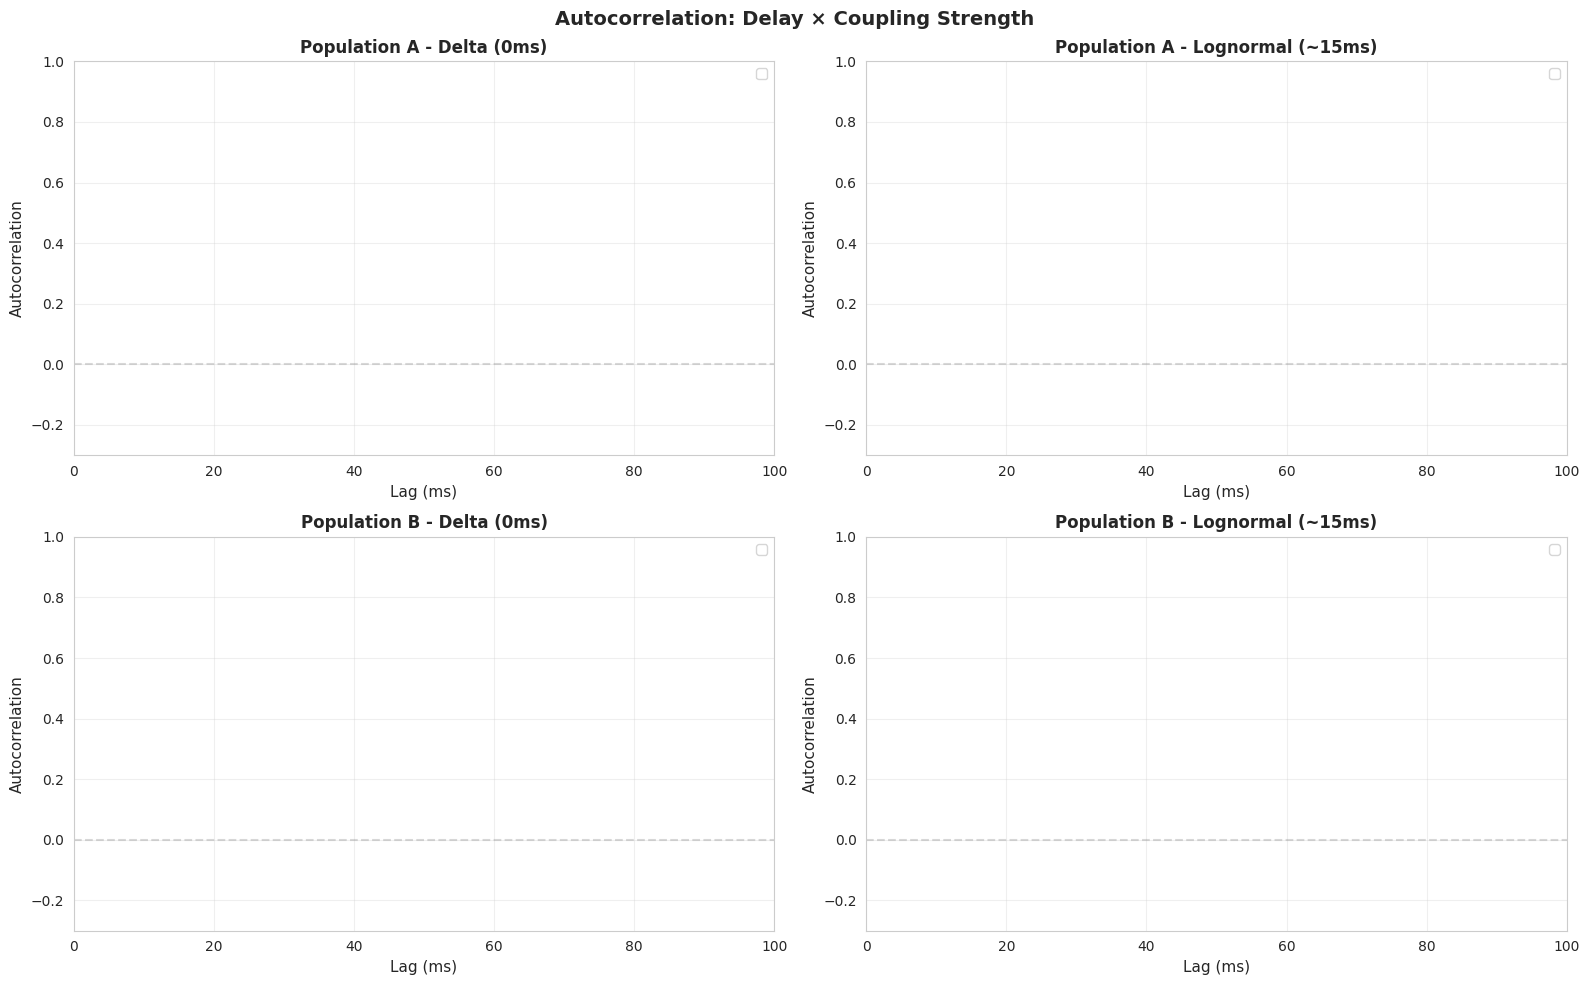

In [13]:
# En src/two_populations/plots/comparison_plots.py

import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

def plot_ac_comparison_sweep(base_dir, delay_families=['DELTA', 'LOGNORMAL'], 
                             couplings=['WEAK', 'MEDIUM', 'STRONG'],
                             save_path='results/ac_comparison.png'):
    """
    Compare AC curves from sweep experiments
    Layout: 2x2 (PopA-Delta, PopA-Lognorm, PopB-Delta, PopB-Lognorm)
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    base_path = Path(base_dir)
    
    
    # Colors para coupling strength
    colors = {
        'WEAK': 'steelblue',
        'MEDIUM': 'darkblue', 
        'STRONG': 'navy',
        'VERYWEAK': 'lightblue',
        'VERYSTRONG': 'midnightblue'
    }
    
    dt = 0.1
    
    for delay_family in delay_families:
        for coupling in couplings:
            # Buscar sweep_results.pkl
            pattern = f"*{delay_family}*{coupling}*/*/sweep_results.pkl"
            sweep_files = list(base_path.glob(pattern))
            
            if not sweep_files:
                continue
                
            sweep_file = sweep_files[0]
            
            with open(sweep_file, 'rb') as f:
                sweep_data = pickle.load(f)
            
            # Primer trial del sweep
            first_trial = sweep_data.iloc[0]
            trial_path = Path(first_trial['trial_path'])
            
            with open(trial_path, 'rb') as f:
                trial = pickle.load(f)
                
            print("Keys trial:", trial.keys())
            print("Keys autocorr_A:", trial['autocorr_A'].keys())
            print("Shape:", np.array(trial['autocorr_A']['lags']).shape)
            
            ac_A = trial['autocorr_A']['lags']
            ac_B = trial['autocorr_B']['lags']
            lags = np.arange(len(ac_A)) * dt
            
            # Determinar columna (Delta=0, Lognormal=1)
            col = 0 if 'DELTA' in delay_family else 1
            
            # Plot
            axes[0, col].plot(lags, ac_A, color=colors[coupling],
                             linewidth=2.5, label=coupling, alpha=0.85)
            axes[1, col].plot(lags, ac_B, color=colors[coupling],
                             linewidth=2.5, label=coupling, alpha=0.85)
    
    # Formatting
    titles = [
        ['Population A - Delta (0ms)', 'Population A - Lognormal (~15ms)'],
        ['Population B - Delta (0ms)', 'Population B - Lognormal (~15ms)']
    ]
    
    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            ax.axhline(0, color='gray', linestyle='--', alpha=0.3)
            ax.set_xlabel('Lag (ms)', fontsize=11)
            ax.set_ylabel('Autocorrelation', fontsize=11)
            ax.set_title(titles[i][j], fontsize=12, fontweight='bold')
            ax.legend(fontsize=10, loc='upper right')
            ax.grid(alpha=0.3)
            ax.set_xlim([0, 100])
            ax.set_ylim([-0.3, 1.0])
    
    plt.suptitle('Autocorrelation: Delay × Coupling Strength', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    
    return fig

# Uso
base_dir = './results/experiments/two_populations/step_input_diff_rois/20251009_171310'
fig = plot_ac_comparison_sweep(base_dir)

In [ ]:
# %% CARGAR Y PROMEDIAR CC CURVES SOBRE TRIALS
def load_and_average_cc_curves(sweep_dir, df_subset, n_trials=10):
    """Cargar y promediar curvas CC sobre múltiples trials"""
    cc_averaged = {}
    
    for _, row in df_subset.iterrows():
        config_name = row['config']
        sweep_subdir = row['sweep_dir']
        
        # Cargar todos los trials
        all_lags = []
        all_correlations = []
        all_peaks = []
        
        for trial_idx in range(n_trials):
            trial_file = sweep_dir / sweep_subdir / "figures" / config_name / f"trial_{trial_idx+1}_full.pkl"
            
            if not trial_file.exists():
                continue
                
            with open(trial_file, 'rb') as f:
                trial = pickle.load(f)
            
            cc = trial.get('cross_correlation', {})
            if 'lags' in cc and len(cc['lags']) > 0:
                all_lags.append(cc['lags'])
                all_correlations.append(cc['correlation'])
                if cc.get('peak_lag') is not None:
                    all_peaks.append(cc['peak_lag'])
        
        # Promediar si hay datos
        if len(all_correlations) > 0:
            # Usar lags del primer trial (deberían ser iguales)
            lags = all_lags[0]
            
            # Promediar correlaciones
            corr_mean = np.mean(all_correlations, axis=0)
            corr_std = np.std(all_correlations, axis=0)
            
            # Pico promedio
            peak_lag_mean = np.mean(all_peaks) if all_peaks else None
            
            cc_averaged[config_name] = {
                'lags': lags,
                'correlation_mean': corr_mean,
                'correlation_std': corr_std,
                'peak_lag_mean': peak_lag_mean,
                'n_trials': len(all_correlations)
            }
    
    return cc_averaged

# %% PLOT CC PROMEDIADO CON STD
def plot_cc_averaged_by_coupling(sweep_dir, df_deltas, n_trials=10):
    couplings = ['NULL', 'VERYWEAK', 'WEAK', 'MEDIUM', 'STRONG', 'VERYSTRONG']
    delays = sorted(df_deltas['delay_mean_ms'].unique())
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    colors = plt.cm.viridis(np.linspace(0, 1, len(delays)))
    
    for ax, coupling in zip(axes, couplings):
        subset = df_deltas[df_deltas['coupling_label'] == coupling]
        
        # Cargar y promediar datos
        cc_data = load_and_average_cc_curves(sweep_dir, subset, n_trials)
        
        for delay, color in zip(delays, colors):
            config = subset[subset['delay_mean_ms'] == delay]['config'].values
            if len(config) == 0:
                continue
            config = config[0]
            
            if config in cc_data:
                cc = cc_data[config]
                
                # Línea promedio
                ax.plot(cc['lags'], cc['correlation_mean'], 
                       color=color, linewidth=2, alpha=0.9,
                       label=f'{delay:.1f} ms (n={cc["n_trials"]})')
                
                # Banda de std
                ax.fill_between(cc['lags'],
                               cc['correlation_mean'] - cc['correlation_std'],
                               cc['correlation_mean'] + cc['correlation_std'],
                               color=color, alpha=0.2)
                
                # Marcar pico promedio
                if cc['peak_lag_mean'] is not None:
                    ax.axvline(cc['peak_lag_mean'], color=color, 
                              linestyle='--', alpha=0.4, linewidth=1)
        
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Cross-Correlation')
        ax.set_title(f"{coupling} (k={subset['weight_scale'].iloc[0]:.2f})")
        ax.legend(ncol=2, fontsize=7, loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-20, 30)
    
    plt.suptitle(f'Averaged Cross-Correlation Curves (n={n_trials} trials)', fontsize=14)
    plt.tight_layout()
    return fig

# Ejecutar
sweep_dir_delta = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310')
df_deltas = df_all[df_all['delay_family'] == 'DELTA']

fig = plot_cc_averaged_by_coupling(sweep_dir_delta, df_deltas, n_trials=10)
plt.show()

In [ ]:
# %% PLOT COMPARATIVO: ISO-DELAY E ISO-COUPLING
def plot_cc_comparative(sweep_dir, df_deltas, n_trials=10):
    """
    Comparación:
    - Fila 1: 3 delays fijos, variando coupling
    - Fila 2: 3 couplings fijos, variando delay
    """
    
    # Cargar datos una sola vez
    cc_data = load_and_average_cc_curves(sweep_dir, df_deltas, n_trials)
    
    # Seleccionar subsets
    selected_delays = [0.1, 6.0, 15.0]  # Corto, medio, largo
    selected_couplings = ['WEAK', 'MEDIUM', 'STRONG']  # Bajo, medio, alto
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # === FILA 1: ISO-DELAY (variar coupling) ===
    for i, delay in enumerate(selected_delays):
        ax = axes[0, i]
        
        for coupling in selected_couplings:
            subset = df_deltas[(df_deltas['delay_mean_ms'] == delay) & 
                              (df_deltas['coupling_label'] == coupling)]
            
            if len(subset) == 0:
                continue
            
            config = subset['config'].values[0]
            weight = subset['weight_scale'].values[0]
            
            if config in cc_data:
                cc = cc_data[config]
                
                ax.plot(cc['lags'], cc['correlation_mean'],
                       linewidth=2, alpha=0.9,
                       label=f'{coupling} (k={weight:.2f})')
                
                ax.fill_between(cc['lags'],
                               cc['correlation_mean'] - cc['correlation_std'],
                               cc['correlation_mean'] + cc['correlation_std'],
                               alpha=0.15)
        
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Cross-Correlation')
        ax.set_title(f'Fixed Delay = {delay:.1f} ms')
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-20, 30)
    
    # === FILA 2: ISO-COUPLING (variar delay) ===
    all_delays = sorted(df_deltas['delay_mean_ms'].unique())
    delay_colors = plt.cm.viridis(np.linspace(0, 1, len(all_delays)))
    delay_color_map = dict(zip(all_delays, delay_colors))
    
    for i, coupling in enumerate(selected_couplings):
        ax = axes[1, i]
        
        for delay in all_delays:
            subset = df_deltas[(df_deltas['delay_mean_ms'] == delay) & 
                              (df_deltas['coupling_label'] == coupling)]
            
            if len(subset) == 0:
                continue
            
            config = subset['config'].values[0]
            
            if config in cc_data:
                cc = cc_data[config]
                color = delay_color_map[delay]
                
                ax.plot(cc['lags'], cc['correlation_mean'],
                       color=color, linewidth=1.5, alpha=0.8,
                       label=f'{delay:.1f} ms')
                
                ax.fill_between(cc['lags'],
                               cc['correlation_mean'] - cc['correlation_std'],
                               cc['correlation_mean'] + cc['correlation_std'],
                               color=color, alpha=0.15)
                
                # Marcar pico
                if cc['peak_lag_mean'] is not None:
                    ax.axvline(cc['peak_lag_mean'], color=color,
                              linestyle='--', alpha=0.3, linewidth=1)
        
        weight = df_deltas[df_deltas['coupling_label'] == coupling]['weight_scale'].values[0]
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Cross-Correlation')
        ax.set_title(f'Fixed Coupling = {coupling} (k={weight:.2f})')
        ax.legend(ncol=2, fontsize=8, loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-20, 30)
    
    plt.suptitle('Cross-Correlation Analysis: Delay vs Coupling Effects', 
                 fontsize=15, y=0.995)
    plt.tight_layout()
    return fig

# Ejecutar
sweep_dir_delta = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310')
df_deltas = df_all[df_all['delay_family'] == 'DELTA']

fig = plot_cc_comparative(sweep_dir_delta, df_deltas, n_trials=10)
plt.show()

In [ ]:
# %% PLOT COMPACTO: 4 CASOS CLAVE
def plot_cc_key_cases(sweep_dir, df_deltas, n_trials=10):
    """
    Plot compacto mostrando 4 casos:
    - delay=0, coupling=VERYWEAK
    - delay=0, coupling=STRONG
    - delay=20, coupling=VERYWEAK
    - delay=20, coupling=STRONG
    """
    
    # Cargar datos
    cc_data = load_and_average_cc_curves(sweep_dir, df_deltas, n_trials)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Casos a plotear
    cases = [
        {'delay': 0.1, 'coupling': 'VERYWEAK', 'color': '#1f77b4', 'ls': '-', 'label': 'Delay 0ms, Weak coupling'},
        {'delay': 20.0, 'coupling': 'VERYWEAK', 'color': '#1f77b4', 'ls': '--', 'label': 'Delay 20ms, Weak coupling'},
        {'delay': 0.1, 'coupling': 'STRONG', 'color': '#d62728', 'ls': '-', 'label': 'Delay 0ms, Strong coupling'},
        {'delay': 20.0, 'coupling': 'STRONG', 'color': '#d62728', 'ls': '--', 'label': 'Delay 20ms, Strong coupling'},
    ]
    
    for case in cases:
        subset = df_deltas[(df_deltas['delay_mean_ms'] == case['delay']) & 
                          (df_deltas['coupling_label'] == case['coupling'])]
        
        if len(subset) == 0:
            continue
        
        config = subset['config'].values[0]
        weight = subset['weight_scale'].values[0]
        
        if config in cc_data:
            cc = cc_data[config]
            
            # Línea principal
            ax.plot(cc['lags'], cc['correlation_mean'],
                   color=case['color'], linestyle=case['ls'],
                   linewidth=2.5, alpha=0.9,
                   label=f"{case['label']} (k={weight:.2f})")
            
            # Banda std (más sutil)
            ax.fill_between(cc['lags'],
                           cc['correlation_mean'] - cc['correlation_std'],
                           cc['correlation_mean'] + cc['correlation_std'],
                           color=case['color'], alpha=0.12)
            
            # Marcar pico
            if cc['peak_lag_mean'] is not None:
                ax.axvline(cc['peak_lag_mean'], color=case['color'],
                          linestyle=':', alpha=0.5, linewidth=1.5)
    
    ax.set_xlabel('Lag (ms)', fontsize=12)
    ax.set_ylabel('Cross-Correlation', fontsize=12)
    ax.set_title('Cross-Correlation: Delay & Coupling Effects', fontsize=14)
    ax.legend(loc='upper right', fontsize=10, framealpha=0.95)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-10, 30)
    
    plt.tight_layout()
    return fig

# Ejecutar
sweep_dir_delta = Path('./results/experiments/two_populations/step_input_diff_rois/20251009_171310')
df_deltas = df_all[df_all['delay_family'] == 'DELTA']

fig = plot_cc_key_cases(sweep_dir_delta, df_deltas, n_trials=10)
plt.show()

In [ ]:
# %% CORRECCIÓN DE OFFSET BASAL EN LAGS
# El cc_lag incluye latencias intrínsecas del sistema (~6ms)
# Normalizamos usando delay=0 como baseline

# %% CORRECCIÓN OFFSET BASAL
baseline_lag = df_all[df_all['delay_mean_ms'] == 0.1].groupby('coupling_label')['cc_lag_mean_ms'].mean()

for coupling in df_all['coupling_label'].unique():
    if coupling in baseline_lag.index:
        mask = df_all['coupling_label'] == coupling
        df_all.loc[mask, 'cc_lag_corrected'] = df_all.loc[mask, 'cc_lag_mean_ms'] - baseline_lag[coupling]
        df_all.loc[mask, 'lag_error_corrected'] = df_all.loc[mask, 'cc_lag_corrected'] - (df_all.loc[mask, 'delay_mean_ms'] - 0.1)

print("Baseline por coupling:", baseline_lag.round(2))

In [ ]:
# Check delay values
print("Delays únicos:")
print(sorted(df_all['delay_mean_ms'].unique()))

# Check coupling-weight mapping
print("\nCoupling → Weight:")
print(df_all[['coupling_label', 'weight_scale']].drop_duplicates().sort_values('weight_scale'))

# Sample data
print("\nSample:")
print(df_all[['config', 'coupling_label', 'delay_mean_ms', 'plv_alpha_mean', 'cc_peak_mean']].head(14))

## 2. Inspección inicial

In [ ]:
# %% ESTADÍSTICAS BÁSICAS
print("=== ESTADÍSTICAS BÁSICAS ===\n")
print("Métricas disponibles:")
metric_cols = [c for c in df_all.columns if '_mean' in c or '_std' in c]
for col in sorted(metric_cols):
    print(f"  - {col}")

print("\nRangos de valores clave:")
key_metrics = ['plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean', 
               'coh_peak_mean', 'delay_mean_ms', 'delay_std_ms']
print(df_all[key_metrics].describe())

In [ ]:
# %% DISTRIBUCIÓN DE DELAYS
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Media de delays por tipo
ax = axes[0]
sns.boxplot(data=df_all, x='delay_type', y='delay_mean_ms', hue='coupling_label', ax=ax)
ax.set_title('Delay Mean by Distribution Type')
ax.set_xlabel('Distribution Type')
ax.set_ylabel('Mean Delay (ms)')
ax.legend(title='Coupling', bbox_to_anchor=(1.05, 1), loc='upper left')

# Varianza de delays por tipo
ax = axes[1]
sns.boxplot(data=df_all, x='delay_type', y='delay_std_ms', hue='coupling_label', ax=ax)
ax.set_title('Delay Std by Distribution Type')
ax.set_xlabel('Distribution Type')
ax.set_ylabel('Std Delay (ms)')
ax.legend(title='Coupling', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 3. Análisis de acoplamiento funcional

In [ ]:
# %% SCATTER: PLV vs Delay Mean (with lines by coupling)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

metrics = ['plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean', 'coh_peak_mean']
titles = ['PLV Alpha', 'PLI Alpha', 'Cross-Correlation Peak', 'Coherence Peak']
std_cols = ['plv_alpha_std', 'pli_alpha_std', 'cc_peak_std', 'coh_peak_std']

# Ordenar couplings por weight_scale
coupling_order = df_all.groupby('coupling_label')['weight_scale'].mean().sort_values().index
colors = plt.cm.viridis(np.linspace(0, 1, len(coupling_order)))

for ax, metric, title, std_col in zip(axes, metrics, titles, std_cols):
    for coupling, color in zip(coupling_order, colors):
        subset = df_all[df_all['coupling_label'] == coupling].sort_values('delay_mean_ms')
        
        if len(subset) == 0:
            continue
        
        # Línea + puntos
        ax.plot(subset['delay_mean_ms'], subset[metric], 
                'o-', color=color, linewidth=2, markersize=6,
                label=f"{coupling} (k={subset['weight_scale'].iloc[0]:.2f})")
        
        # Degradado std si hay datos
        if std_col in subset.columns and not subset[std_col].isna().all():
            ax.fill_between(subset['delay_mean_ms'],
                           subset[metric] - subset[std_col],
                           subset[metric] + subset[std_col],
                           color=color, alpha=0.2)
    
    ax.set_xlabel('Mean Delay (ms)')
    ax.set_ylabel(title)
    ax.set_title(f'{title} vs Mean Delay')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% SCATTER: PLV vs Delay Std (varianza)
fig, ax = plt.subplots(figsize=(10, 6))

for coupling in sorted(df_all['coupling_label'].unique()):
    subset = df_all[df_all['coupling_label'] == coupling]
    ax.scatter(subset['delay_std_ms'], subset['plv_alpha_mean'],
              label=coupling, s=80, alpha=0.7, edgecolors='k', linewidth=0.5)

ax.set_xlabel('Delay Std (ms)', fontsize=12)
ax.set_ylabel('PLV Alpha', fontsize=12)
ax.set_title('PLV vs Delay Variability (by Coupling)', fontsize=14)
ax.legend(title='Coupling')
ax.grid(True, alpha=0.3)

# Línea de tendencia global
z = np.polyfit(df_all['delay_std_ms'].dropna(), df_all['plv_alpha_mean'].dropna(), 1)
p = np.poly1d(z)
x_trend = np.linspace(df_all['delay_std_ms'].min(), df_all['delay_std_ms'].max(), 100)
ax.plot(x_trend, p(x_trend), 'k--', alpha=0.5, linewidth=2, label='Linear trend')

# Correlación
r, pval = stats.pearsonr(df_all['delay_std_ms'].dropna(), df_all['plv_alpha_mean'].dropna())
ax.text(0.05, 0.95, f'r = {r:.3f}, p = {pval:.3e}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [ ]:
# %% LAG ERRORS
print("Lag errors por delay:")
print(df_all.groupby('delay_mean_ms')['lag_error_corrected'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nLag errors por coupling:")
print(df_all.groupby('coupling_label')['lag_error_corrected'].agg(['mean', 'std']).round(2))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for coupling in coupling_order:
    subset = df_all[df_all['coupling_label'] == coupling].sort_values('delay_mean_ms')
    ax.plot(subset['delay_mean_ms'], subset['lag_error_corrected'], 'o-', label=coupling)

ax.axhline(0, color='k', linestyle='--', alpha=0.5, label='Zero error')
ax.set_xlabel('Configured Delay (ms)')
ax.set_ylabel('Lag Error (corrected) [ms]')
ax.set_title('Lag Detection Accuracy (Baseline Corrected)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 4. Comparación entre distribuciones (mismo μ)

In [ ]:
# %% COMPARAR CONFIGS CON μ≈6ms
# Filtrar configs con delay_mean entre 5-7ms
df_mu6 = df_all[(df_all['delay_mean_ms'] >= 5) & (df_all['delay_mean_ms'] <= 7)]

print(f"Configs con μ≈6ms: {len(df_mu6)}")
print(df_mu6[['config', 'delay_type', 'delay_mean_ms', 'delay_std_ms', 
              'plv_alpha_mean', 'weight_scale']].sort_values('plv_alpha_mean'))

# %% BOXPLOT: PLV por delay_type (mismo rango de μ)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics_to_compare = [('plv_alpha_mean', 'PLV Alpha'), 
                      ('cc_peak_mean', 'Cross-Corr Peak')]

for ax, (metric, label) in zip(axes, metrics_to_compare):
    sns.boxplot(data=df_mu6, x='delay_type', y=metric, hue='coupling_label', ax=ax)
    ax.set_title(f'{label} by Distribution Type (μ≈6ms)')
    ax.set_xlabel('Distribution Type')
    ax.set_ylabel(label)
    ax.legend(title='Coupling')

plt.tight_layout()
plt.show()

## 5. Heatmaps: Coupling × Delay Type

In [ ]:
# %% HEATMAP PLV
# Crear pivot table
pivot_plv = df_all.pivot_table(values='plv_alpha_mean', 
                                index='delay_type',
                                columns='coupling_label',
                                aggfunc='mean')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot_plv, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0.2, vmax=0.8, ax=ax, cbar_kws={'label': 'PLV Alpha'})
ax.set_title('PLV Alpha: Distribution Type × Coupling Strength')
ax.set_xlabel('Coupling Level')
ax.set_ylabel('Delay Distribution')
plt.tight_layout()
plt.show()

# %% HEATMAP PLI
pivot_pli = df_all.pivot_table(values='pli_alpha_mean',
                                index='delay_type',
                                columns='coupling_label',
                                aggfunc='mean')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot_pli, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.1, vmax=0.6, ax=ax, cbar_kws={'label': 'PLI Alpha'})
ax.set_title('PLI Alpha: Distribution Type × Coupling Strength')
ax.set_xlabel('Coupling Level')
ax.set_ylabel('Delay Distribution')
plt.tight_layout()
plt.show()

# %% HEATMAP CC Peak
pivot_cc = df_all.pivot_table(values='cc_peak_mean',
                               index='delay_type',
                               columns='coupling_label',
                               aggfunc='mean')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot_cc, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.0, vmax=0.6, ax=ax, cbar_kws={'label': 'CC Peak'})
ax.set_title('Cross-Correlation Peak: Distribution Type × Coupling Strength')
ax.set_xlabel('Coupling Level')
ax.set_ylabel('Delay Distribution')
plt.tight_layout()
plt.show()


In [ ]:
# %% HEATMAP por delay_mean (mejor para deltas)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean']
titles = ['PLV Alpha', 'PLI Alpha', 'CC Peak']

for ax, metric, title in zip(axes, metrics, titles):
    pivot = df_all.pivot_table(values=metric,
                                index='delay_mean_ms',
                                columns='coupling_label',
                                aggfunc='mean')
    
    # Reordenar columnas por coupling
    col_order = ['NULL', 'VERYWEAK', 'WEAK', 'MEDIUM', 'STRONG', 'VERYSTRONG']
    pivot = pivot[[c for c in col_order if c in pivot.columns]]
    
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn',
               vmin=0.1, vmax=0.7, ax=ax,
               cbar_kws={'label': title})
    
    ax.set_title(title)
    ax.set_xlabel('Coupling')
    ax.set_ylabel('Delay (ms)')

plt.tight_layout()
plt.show()

## 6. Análisis de lags efectivos

In [ ]:
# %% LAG EFECTIVO vs TEÓRICO (con corrección)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter
ax = axes[0]
for coupling in coupling_order:
    subset = df_all[df_all['coupling_label'] == coupling]
    ax.scatter(subset['delay_mean_ms'], subset['cc_lag_mean_ms'],
              label=coupling, s=60, alpha=0.7, edgecolors='k', linewidth=0.5)

max_val = max(df_all['delay_mean_ms'].max(), df_all['cc_lag_mean_ms'].max())
ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=2, label='Identity')
ax.set_xlabel('Configured Delay (ms)')
ax.set_ylabel('Detected CC Lag (ms)')
ax.set_title('Effective vs Theoretical Delay')
ax.legend()
ax.grid(True, alpha=0.3)

# Histogram (CORRECTED)
ax = axes[1]
ax.hist(df_all['lag_error_corrected'].dropna(), bins=30, edgecolor='k', alpha=0.7)
ax.axvline(0, color='r', linestyle='--', linewidth=2, label='Zero error')
ax.set_xlabel('Lag Error (corrected) [ms]')
ax.set_ylabel('Count')
ax.set_title('Distribution of Lag Errors (Baseline Corrected)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Lag error (corrected) statistics:")
print(df_all['lag_error_corrected'].describe())

## 7. PLV/PLI Gap (linealidad del acoplamiento)

In [ ]:
# %% PLV-PLI GAP ANALYSIS
df_all['plv_pli_gap_alpha'] = df_all['plv_alpha_mean'] - df_all['pli_alpha_mean']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gap vs coupling
ax = axes[0]
sns.boxplot(data=df_all, x='coupling_label', y='plv_pli_gap_alpha', ax=ax)
ax.set_title('PLV-PLI Gap by Coupling Level')
ax.set_xlabel('Coupling Strength')
ax.set_ylabel('PLV - PLI (Alpha)')
ax.axhline(0, color='k', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3)

# Gap vs delay variability
ax = axes[1]
scatter = ax.scatter(df_all['delay_std_ms'], df_all['plv_pli_gap_alpha'],
                    c=df_all['weight_scale'], cmap='viridis',
                    s=60, alpha=0.7, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Delay Std (ms)')
ax.set_ylabel('PLV - PLI (Alpha)')
ax.set_title('PLV-PLI Gap vs Delay Variability')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Coupling', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

print("\nPLV-PLI Gap interpretation:")
print("  Gap > 0.3: Strong linear/volumetric coupling")
print("  Gap 0.1-0.3: Mixed coupling")
print("  Gap < 0.1: Directional/phase-specific coupling")
print(f"\nMean gap: {df_all['plv_pli_gap_alpha'].mean():.3f} ± {df_all['plv_pli_gap_alpha'].std():.3f}")


## 8. Análisis específico de distribuciones atípicas

In [ ]:
# %% BETA BIMODAL CHECK
# Identificar configs beta bimodal si existen
beta_bimodal = df_all[df_all['config'].str.contains('bimodal', case=False, na=False)]

if len(beta_bimodal) > 0:
    print(f"✓ Beta bimodal configs encontradas: {len(beta_bimodal)}")
    print(beta_bimodal[['config', 'delay_mean_ms', 'delay_std_ms', 
                        'plv_alpha_mean', 'cc_lag_mean_ms']])
    
    # Comparar con beta simétrica
    beta_sym = df_all[df_all['config'].str.contains('beta_sym', case=False, na=False)]
    
    if len(beta_sym) > 0:
        fig, ax = plt.subplots(figsize=(10, 6))
        
        metrics_comp = ['plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean']
        x = np.arange(len(metrics_comp))
        width = 0.35
        
        bimodal_vals = [beta_bimodal[m].mean() for m in metrics_comp]
        sym_vals = [beta_sym[m].mean() for m in metrics_comp]
        
        ax.bar(x - width/2, bimodal_vals, width, label='Beta Bimodal', alpha=0.8)
        ax.bar(x + width/2, sym_vals, width, label='Beta Symmetric', alpha=0.8)
        
        ax.set_ylabel('Metric Value')
        ax.set_title('Beta Bimodal vs Symmetric')
        ax.set_xticks(x)
        ax.set_xticklabels(['PLV α', 'PLI α', 'CC Peak'])
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
else:
    print("⚠️  No se encontraron configs beta bimodal")


## 9. Correlaciones globales

In [ ]:
# %% MATRIZ DE CORRELACIÓN
# Seleccionar métricas clave
corr_cols = ['delay_mean_ms', 'delay_std_ms', 'weight_scale',
             'plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean',
             'coh_peak_mean', 'cc_lag_mean_ms', 'tauA_mean_ms', 'tauB_mean_ms']

corr_matrix = df_all[corr_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, square=True, ax=ax,
            cbar_kws={'label': 'Pearson r'})
ax.set_title('Correlation Matrix: Delays, Coupling & Metrics')
plt.tight_layout()
plt.show()

## 10. Exportar resultados clave

In [ ]:
# # %% GUARDAR ANÁLISIS
# output_dir = BASE_DIR / 'consolidated_analysis'
# output_dir.mkdir(exist_ok=True)

# # DataFrame consolidado
# df_all.to_csv(output_dir / 'all_configs_consolidated.csv', index=False)

# # Resumen estadístico
# summary_stats = df_all.groupby(['delay_type', 'coupling_label']).agg({
#     'plv_alpha_mean': ['mean', 'std'],
#     'pli_alpha_mean': ['mean', 'std'],
#     'cc_peak_mean': ['mean', 'std'],
#     'delay_mean_ms': 'mean',
#     'delay_std_ms': 'mean'
# }).round(3)

# summary_stats.to_csv(output_dir / 'summary_statistics.csv')

# print(f"\n✓ Análisis guardado en: {output_dir}")
# print(f"  - all_configs_consolidated.csv")
# print(f"  - summary_statistics.csv")


## 11. Conclusiones preliminares

In [ ]:
# %% RESUMEN EJECUTIVO
print("=" * 60)
print("RESUMEN EJECUTIVO")
print("=" * 60)

print(f"\n📊 DATOS ANALIZADOS:")
print(f"  • Configuraciones totales: {len(df_all)}")
print(f"  • Distribuciones de delays: {len(df_all['delay_type'].unique())}")
print(f"  • Niveles de acoplamiento: {len(df_all['coupling_label'].unique())}")
print(f"  • Rango de delays medios: {df_all['delay_mean_ms'].min():.1f} - {df_all['delay_mean_ms'].max():.1f} ms")

print(f"\n🔍 HALLAZGOS PRINCIPALES:")

# 1. Efecto del acoplamiento
plv_by_coupling = df_all.groupby('coupling_label')['plv_alpha_mean'].mean().sort_values()
print(f"\n  1. PLV Alpha por acoplamiento:")
for coupling, plv in plv_by_coupling.items():
    print(f"     {coupling:12s}: {plv:.3f}")

# 2. Efecto de la distribución
plv_by_dist = df_all.groupby('delay_type')['plv_alpha_mean'].mean().sort_values()
print(f"\n  2. PLV Alpha por distribución:")
for dist, plv in plv_by_dist.items():
    print(f"     {dist:12s}: {plv:.3f}")

# 3. Correlación delay-métricas
r_delay_plv, p_delay_plv = stats.pearsonr(df_all['delay_mean_ms'].dropna(), 
                                           df_all['plv_alpha_mean'].dropna())
r_std_plv, p_std_plv = stats.pearsonr(df_all['delay_std_ms'].dropna(),
                                       df_all['plv_alpha_mean'].dropna())
print(f"\n  3. Correlaciones con PLV Alpha:")
print(f"     delay_mean: r={r_delay_plv:+.3f} (p={p_delay_plv:.2e})")
print(f"     delay_std:  r={r_std_plv:+.3f} (p={p_std_plv:.2e})")

# 4. PLV-PLI gap
mean_gap = df_all['plv_pli_gap_alpha'].mean()
print(f"\n  4. PLV-PLI Gap medio: {mean_gap:.3f}")
if mean_gap > 0.3:
    print(f"     → Acoplamiento predominantemente lineal/volumétrico")
elif mean_gap > 0.1:
    print(f"     → Acoplamiento mixto")
else:
    print(f"     → Acoplamiento direccional/fase-específico")

# 5. Lag errors
# En Celda 11, línea del error de lag:
mean_lag_error = df_all['lag_error_corrected'].mean()
std_lag_error = df_all['lag_error_corrected'].std()
print(f"\n  5. Error en detección de lag: {mean_lag_error:.2f} ± {std_lag_error:.2f} ms")
if abs(mean_lag_error) < 2:
    print(f"     ✓ Precisión excelente")
else:
    print(f"     ⚠️  Sesgo moderado")

print("\n" + "=" * 60)

## 12. Análisis 3D: Coupling × Delay Family × Delay

In [ ]:
# %% DIMENSION 1: PLV vs Coupling (by delay value)
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar por delay_mean
delay_values = sorted(df_all['delay_mean_ms'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(delay_values)))

for delay, color in zip(delay_values, colors):
    subset = df_all[df_all['delay_mean_ms'] == delay].sort_values('weight_scale')
    
    ax.plot(subset['weight_scale'], subset['plv_alpha_mean'],
            'o-', color=color, linewidth=2, markersize=6,
            label=f'{delay:.1f} ms')
    
    ax.fill_between(subset['weight_scale'],
                    subset['plv_alpha_mean'] - subset['plv_alpha_std'],
                    subset['plv_alpha_mean'] + subset['plv_alpha_std'],
                    color=color, alpha=0.2)

ax.set_xlabel('Coupling Strength')
ax.set_ylabel('PLV Alpha')
ax.set_title('PLV vs Coupling (by delay value)')
ax.legend(title='Delay', ncol=2, fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# %% DIMENSION 2: Efecto de parámetros del delay (mismo coupling)
# Para cada coupling, comparar diferentes configs del mismo delay_family

if 'delay_family' in df_all.columns:
    for coupling in sorted(df_all['coupling_label'].unique()):
        subset_coupling = df_all[df_all['coupling_label'] == coupling]
        
        # Agrupar por delay_family
        families = subset_coupling['delay_family'].unique()
        
        if len(families) == 0:
            continue
        
        fig, axes = plt.subplots(1, len(families), figsize=(5*len(families), 4))
        if len(families) == 1:
            axes = [axes]
        
        for ax, family in zip(axes, families):
            subset_family = subset_coupling[subset_coupling['delay_family'] == family]
            
            # Plot cada config
            for config in subset_family['config'].unique():
                config_data = subset_family[subset_family['config'] == config]
                
                ax.errorbar(config_data['delay_mean_ms'], 
                           config_data['plv_alpha_mean'],
                           xerr=config_data['delay_std_ms'],
                           yerr=config_data['plv_alpha_std'],
                           fmt='o', markersize=8, capsize=5,
                           label=config_data['readable_name'].iloc[0])
            
            ax.set_xlabel('Delay Mean (ms)')
            ax.set_ylabel('PLV Alpha')
            ax.set_title(f'{family} delays')
            ax.legend(fontsize=8, loc='best')
            ax.grid(True, alpha=0.3)
        
        plt.suptitle(f'Coupling: {coupling}', fontsize=14)
        plt.tight_layout()
        plt.show()

In [ ]:
# %% DIMENSION 3: Comparación entre familias de delays
# Para cada coupling, comparar delay families (collapse configs)

metrics_to_compare = ['plv_alpha_mean', 'pli_alpha_mean', 'cc_peak_mean']
metric_labels = ['PLV Alpha', 'PLI Alpha', 'CC Peak']

for coupling in sorted(df_all['coupling_label'].unique()):
    subset = df_all[df_all['coupling_label'] == coupling]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for ax, metric, label in zip(axes, metrics_to_compare, metric_labels):
        # Box plot por delay_family
        if 'delay_family' in subset.columns:
            sns.boxplot(data=subset, x='delay_family', y=metric, ax=ax)
            
            # Overlay scatter para ver configs individuales
            sns.stripplot(data=subset, x='delay_family', y=metric, 
                         color='k', alpha=0.5, size=4, ax=ax)
        
        ax.set_xlabel('Delay Family')
        ax.set_ylabel(label)
        ax.set_title(label)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'Coupling: {coupling} - Comparison across delay families', fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# %% HEATMAP 3D: delay_mean × coupling × delay_family
# Crear pivot para cada family
if 'delay_family' in df_all.columns:
    families = sorted(df_all['delay_family'].unique())
    
    fig, axes = plt.subplots(1, len(families), figsize=(6*len(families), 5))
    if len(families) == 1:
        axes = [axes]
    
    for ax, family in zip(axes, families):
        subset = df_all[df_all['delay_family'] == family]
        
        # Crear bins para delay_mean
        subset['delay_bin'] = pd.cut(subset['delay_mean_ms'], bins=5)
        
        pivot = subset.pivot_table(values='plv_alpha_mean',
                                   index='delay_bin',
                                   columns='coupling_label',
                                   aggfunc='mean')
        
        sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn',
                   vmin=0.2, vmax=0.8, ax=ax,
                   cbar_kws={'label': 'PLV Alpha'})
        
        ax.set_title(f'{family} delays')
        ax.set_xlabel('Coupling')
        ax.set_ylabel('Delay Range (ms)')
    
    plt.suptitle('PLV Alpha: Delay Range × Coupling (by family)', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# %% SUMMARY TABLE 3D
print("\n" + "=" * 60)
print("RESUMEN 3D: COUPLING × DELAY_FAMILY × METRIC")
print("=" * 60)

if 'delay_family' in df_all.columns:
    summary_3d = df_all.groupby(['coupling_label', 'delay_family']).agg({
        'plv_alpha_mean': ['mean', 'std', 'min', 'max'],
        'pli_alpha_mean': ['mean', 'std'],
        'cc_peak_mean': ['mean', 'std'],
        'delay_mean_ms': ['mean', 'min', 'max'],
        'config': 'count'
    }).round(3)
    
    summary_3d.columns = ['_'.join(col).strip() for col in summary_3d.columns.values]
    print(summary_3d)
    
    # Guardar
    output_dir = BASE_DIRS[0] / 'consolidated_analysis'
    output_dir.mkdir(exist_ok=True)
    summary_3d.to_csv(output_dir / 'summary_3D_coupling_family.csv')
    print(f"\n✓ Guardado en: {output_dir / 'summary_3D_coupling_family.csv'}")
